In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.linear_model import ElasticNet
import itertools

data = pd.read_csv("all_video_data.csv")
data

,Unnamed: 0,video_id,views_2021,likes_2021,dislikes_2021,comments_2021,positivity_score,views_2023,likes_2023,comments_2023,upload_date,channel_id,title,description,channel_name,tags,genre
0,0,--0bCF-iK2E,1048888,19515,226,1319,1.437771,1407150.0,24776.0,1438.0,2021-07-01T10:00:00Z,UC6UL29enLNe4mqwTfAyeNuw,Jadon Sancho • Magical Skills & Goals,Enjoy the best skills and goals from Jadon San...,Bundesliga,"['football', 'soccer', 'fútbol alemán', 'Bunde...",Sports
1,1,--DKkzWVh-E,715724,32887,367,1067,0.840191,2800847.0,64954.0,1782.0,2021-12-07T13:00:00Z,UCMOqf8ab-42UUQIdVoKwjlQ,Why Retaining Walls Collapse,One of the most important (and innocuous) part...,Practical Engineering,"['retaining wall', 'New Jersey highway', 'Dire...",Education
2,2,-024Swollbc,271736,16622,90,743,1.383900,290703.0,17174.0,727.0,2021-03-03T15:00:00Z,UCOpP5PqrzODWpFU961acUbg,We sold my bike for charity! Find out who got ...,Today we actually send the P7 off to its new h...,Berm Peak Express,"['do it yourself', 'diy', 'tools', 'home', 'ba...",Howto & Style
3,3,-0PZSxZuAXQ,535044,9207,384,1900,2.405300,538957.0,9228.0,1787.0,2021-08-06T12:10:25Z,UChi08h4577eFsNXGd3sxYhw,"The Breakfast Club Reacts to Kanye West's ""DON...",Subscribe NOW to The Breakfast Club: http://ih...,Breakfast Club Power 105.1 FM,"['the breakfast club', 'breakfast club', 'powe...",Entertainment
4,4,-0QSEZIqVWc,598045,9431,318,2208,0.162700,622730.0,9713.0,2167.0,2021-08-31T04:46:35Z,UCKB0Q6UkQ1US3-DSoOteU1g,How To Get *EVERY STAND* In AUT (A Universal T...,This is how to get a Stand in A Universal Time...,VarietyJay,"['a universal time sans', 'a universal time ro...",Gaming
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2398,2398,81YXfTH6Kh0,343034,12091,270,1099,0.907487,364447.0,12365.0,1064.0,2021-08-27T19:56:34Z,UCx3djLRPAau8jAmD4x2h16A,FERN GOT ROBBED IN MEXICO & BRI IS FURIOUS!!!,FOLLOW OUR SOCIAL MEDIAS \n\nBrittanys youtube...,Murillo Twins,[''],Film & Animation
2399,2399,832lIAveVKI,360870,22057,235,712,1.022778,371476.0,22229.0,675.0,2021-01-17T18:03:51Z,UChmPDnOUiWx4FrfiljzR_WA,Life After Losing My Mum... (a month later),Hey I've been struggling a bit for the last mo...,Millie T,"['millie t', 'weight loss', 'filler', 'i tried...",Entertainment
2400,2400,83o8_ZuKMik,1297101,56764,1561,4029,1.082500,NaN,NaN,NaN,2021-07-21T13:00:00Z,UCWOA1ZGywLbqmigxE4Qlvuw,The Witcher: Nightmare of the Wolf | Official ...,Face your demons. The Witcher: Nightmare of th...,Netflix,"['Andrzej Sapkowski', 'Cavill', 'Film', 'Geral...",Entertainment
2401,2401,EoPVE9zAiRk,227662,5731,384,751,-0.710300,NaN,NaN,NaN,2020-10-13T10:14:30Z,UCMmVPVb0BwSIOWVeDwlPocQ,Solskjaer DEVASTATED By United Betrayal! Man U...,Man Utd have betrayed and humiliated Ole Gunna...,The United Stand,"['Manchester United', 'Man United', 'Man Utd',...",Entertainment


In [2]:
# data['positivity_score'] = 0
data["dislike_ratio"] = data["dislikes_2021"] / (data["likes_2021"] + data["dislikes_2021"])
data = data[['views_2021', 'likes_2021', 'dislike_ratio', 'comments_2021', 'positivity_score', 'views_2023', 'likes_2023', 'comments_2023', 'genre']]
data.dropna(inplace=True)
data

/tmp/ipykernel_19158/1023825616.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


,views_2021,likes_2021,dislike_ratio,comments_2021,positivity_score,views_2023,likes_2023,comments_2023,genre
0,1048888,19515,0.011448,1319,1.437771,1407150.0,24776.0,1438.0,Sports
1,715724,32887,0.011036,1067,0.840191,2800847.0,64954.0,1782.0,Education
2,271736,16622,0.005385,743,1.383900,290703.0,17174.0,727.0,Howto & Style
3,535044,9207,0.040038,1900,2.405300,538957.0,9228.0,1787.0,Entertainment
4,598045,9431,0.032619,2208,0.162700,622730.0,9713.0,2167.0,Gaming
...,...,...,...,...,...,...,...,...,...
2395,7244656,143666,0.032702,6242,1.966741,11137074.0,205388.0,6720.0,Entertainment
2397,3624619,72562,0.023707,6902,2.143456,6313310.0,96111.0,7950.0,Travel & Events
2398,343034,12091,0.021843,1099,0.907487,364447.0,12365.0,1064.0,Film & Animation
2399,360870,22057,0.010542,712,1.022778,371476.0,22229.0,675.0,Entertainment


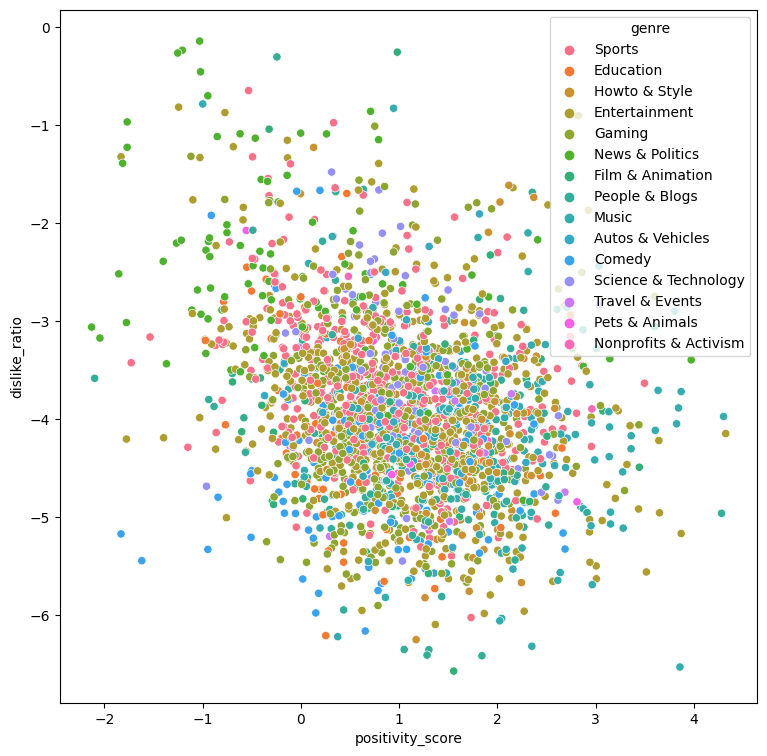

In [16]:
plt.figure(figsize=(9,9));
sns.scatterplot(x=data["positivity_score"],y=np.log(data["dislike_ratio"]),hue=data["genre"],legend="brief");

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.histplot(data["dislike_ratio"])

## Features Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

genre_ohe = OneHotEncoder(sparse=False, handle_unknown='ignore') # Instanciate One hot encoder

genre_ohe.fit(data[['genre']]) # Fit one hot encoder

genre_ohe.categories_ # View categories of genre

In [ ]:
genre_ohe.get_feature_names_out()

In [ ]:
data[genre_ohe.get_feature_names_out()] = genre_ohe.fit_transform(data[['genre']])

data.drop(columns=['genre'], inplace = True) # Drop original column
data

In [ ]:
data.info()

In [ ]:
# with columns 'genre', 'views', 'likes', 'comments', 'positivity_score', and 'dislikes'

# Prepare the data
# X = data[['views_2021', 'likes_2021', 'comments_2021', 'positivity_score', 'genre_Education', 'genre_Entertainment', 'genre_Gaming',
#        'genre_Howto & Style', 'genre_Music', 'genre_Sports']]
# y = data['dislikes_2021']

X = data.drop('dislike_ratio', axis= 1)

y = data['dislike_ratio']

In [ ]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
X_train

In [ ]:
y_train

## Scaling

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Scaling numerical features
# Notice that we already RobutScaled GrLivArea
minmax_scaler = MinMaxScaler()
X_train_scaled = minmax_scaler.fit_transform(X_train)


In [ ]:
X_test_scaled = minmax_scaler.transform(X_test)

In [ ]:
X_test_scaled

In [ ]:
X_train_scaled

In [ ]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict the dislikes for the test set
y_pred = model.predict(X_test_scaled)
dislikes_pred = (X_test["likes_2023"] * y_pred)/(1-y_pred)
np.log(dislikes_pred)

In [ ]:
dislikes_real = (X_test["likes_2023"] * y_test)/(1-y_test)
np.log(dislikes_real)

In [ ]:
np.abs(np.log(dislikes_real) - np.log(dislikes_pred)).mean()

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
import math


mae = mean_absolute_error(y_test, y_pred)
rsquared = r2_score(y_test, y_pred)

print('MAE =', round(mae, 3))
print('R2 =', round(rsquared, 3))


In [ ]:
model.coef_

## Gridsearch

In [ ]:
# Select hyperparam values to try

alphas = [0.01, 0.1, 1] # L1 + L2 
l1_ratios = [0.2, 0.5, 0.8] # L1 / L2 ratio

hyperparams = itertools.product(alphas, l1_ratios) 

In [ ]:
for hyperparam in hyperparams:
    alpha = hyperparam[0]
    l1_ratio = hyperparam[1]
    

    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

    r2 = cross_val_score(model, X_train_scaled, y_train, cv=5).mean()

    print(f"alpha: {alpha}, l1_ratio: {l1_ratio},   r2: {r2}")

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet


# Instantiate model
model = ElasticNet()

# Hyperparameter Grid
grid = {
    'alpha': [0.01, 0.1, 1], 
    'l1_ratio': [0.2, 0.5, 0.8]
}

# Instantiate Grid Search
search = GridSearchCV(
    model,
    grid, 
    scoring = 'r2',
    cv = 5,
    verbose=1,
    n_jobs=-1 # parallelize computation
) 

# Fit data to Grid Search
search.fit(X_train_scaled, y_train);

In [ ]:
# Best score
search.best_score_

In [ ]:
# Best Params
search.best_params_

In [ ]:
# Best estimator
search.best_estimator_